In [ ]:
# library(tibble)
library(tidyr)
#library(selbal)
#ibrary(selbal, lib.loc = "f:/gfs/progs/selbal")
source("/gfs/progs/selbal/R/Selbal_Functions.R")
library(reshape)

In [2]:
run_selbal <- function(dataset_name, method, rank) {
    #metaphlan2/VogtmannE_2016.csv"

    path <- "/gfs/data/curated_metagenomes_"
    path = paste(path, method, sep="")
    path = paste(path, dataset_name, sep="/")
    path = paste(path, "csv", sep=".")

    
    print('Reading file')
    mydata <- read.csv(path, header = TRUE, strip.white=TRUE)
    df <- data.frame(mydata)
    print('df ready')

    df_g <- df[df$Rank==rank,]
    df_g <- df_g[df_g$STUDY_CONDITION != '',]
    print('df_g ready.')
    df_g_subset <- subset(df_g, select=c("Sample_ID", "Name", "Abundance"))
    
    print('pivot started....')

    pivot <- spread(df_g_subset, Name, Abundance)
    
    #pivot <- cast(df_g_subset, Sample_ID ~ Name)
    print('Pivot ready.')

    df_cond <- unique(subset(df_g, select=c("Sample_ID", "STUDY_CONDITION")))

    merged <- merge(x = pivot, y = df_cond, by = "Sample_ID", )
    print('Merge ready.')

    merged_sel <- merged[merged$STUDY_CONDITION!='adenoma',]
    head(merged_sel)

    cols = dim(merged_sel)[2]

    # Define x, y and z
    x <- merged_sel[,3:cols-1]
    print('x ready.')
    #y <- merged_sel[,cols]

    #merged_sel$CRC <- merged_sel$STUDY_CONDITION == "CRC"
    #merged_sel$CRC <- replace(merged_sel$CRC, merged_sel$CRC, "Pos")
    #merged_sel$CRC <- replace(merged_sel$CRC, merged_sel$CRC != "Pos", "Neg")
    #y <- merged_sel$CRC
    #y_fact <- factor(c(y))

    #y_fact <- factor(c(merged_sel$STUDY_CONDITION))
    y_fact <- factor(merged_sel$STUDY_CONDITION)
    print('y ready.')
    #merged_sel$STUDY_CONDITION[merged_sel$STUDY_CONDITION != 1]  <- 0

    #min(merged_sel[!is.na(merged_sel)])
    #b = apply(merged_sel, 1, function(x) 1/as.numeric(min(x, na.rm = TRUE)))
    x_2 = x

    #for (r in 1:dim(x_2)[1]){
    #    x_2[r,] = round(x_2[r,]*b[r])
    #}

    x_2[is.na(x_2)] <- 0
    
    print('x2 un-zerod.')

    rows = dim(x_2)[1]

    for (col_name in colnames(x_2)){
    col = x_2[col_name]
    if (sum(col != 0) <= rows*0.2){
      drop <- c(col_name)
      x_2 = x_2[,!(names(x_2) %in% drop)]
    }
    }
    print('x2 ready.')
    x_2[is.na(x_2)] <- 0
    
    print('Selbal started.')
    
    
    result <- selbal.cv(x = x_2, y = y_fact, covar = NULL, n.fold = 5, n.iter = 10, logit.acc = "AUC")
    print('Selbal finished.')
    
    path_for_plot = "save/"
    path_for_plot = paste(path_for_plot, dataset_name, sep="")
    path_for_plot = paste(path_for_plot, method, sep="_")
    path_for_plot = paste(path_for_plot, rank, sep="_")

    svg(paste(path_for_plot, "accuracy.svg", sep="_"))
    plot(result$accuracy.nvar)
    dev.off()

    svg(paste(path_for_plot, "barplot.svg", sep="_"))
    plot(result$var.barplot)
    dev.off()

    svg(paste(path_for_plot, "globalplot.svg", sep="_"))
    grid.draw(result$global.plot)
    dev.off()

    svg(paste(path_for_plot, "cvtab.svg", sep="_"))
    plot.tab(result$cv.tab)
    dev.off()

    return (result)
}

In [40]:
# A metaphlanos gyors példa:
result = run_selbal("FengQ_2015", "metaphlan2", "p")


[1] "Reading file"
[1] "df ready"
[1] "df_g ready."
[1] "pivot started...."
[1] "Pivot ready."
[1] "Merge ready."
[1] "x ready."
[1] "y ready."
[1] "x2 un-zerod."
[1] "x2 ready."
[1] "Selbal started."


############################################################### 
 STARTING selbal.cv FUNCTION 
###############################################################

#-------------------------------------------------------------# 
# ZERO REPLACEMENT . . .


, . . . FINISHED. 
#-------------------------------------------------------------#

#-------------------------------------------------------------# 
# Starting the cross - validation procedure . . .
 . . . finished. 
#-------------------------------------------------------------# 
###############################################################

 The optimal number of variables is: 3 


 MUHAHAHAHA runtime stuff
 MUHAHAHAHA final balance calcToday is 

Numy is 
0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 

Setting levels: control = CRC, case = control
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


AUC is 
0.854Fitted_values is 
0.611968806472815 0.636221659577017 0.710726821641102 0.882915003465996 0.818405725998365 0.94152288281991 0.0547728339068545 0.889448853809554 0.165088868735478 0.817181274672901 0.619984298736283 0.694267383168662 0.869806359155526 0.840844406181302 0.800415840566023 0.543697200264187 0.674573983159857 0.620608588174163 0.890978654520082 0.443608344028634 0.650460314327223 0.0542522199321192 0.822119530897255 0.95384943351731 0.886041451387414 0.484411136425545 0.370440575215347 0.755517806344908 0.523449896277608 0.727283714384444 0.93509103752885 0.671794267471188 0.874494251465907 0.797990101475711 0.910720783725485 0.964273482223442 0.679018394025724 0.764546387324034 0.972188237700194 0.945970377601133 0.826993010783615 0.731446798293966 0.724510794251906 0.908811646708497 0.363803779361572 0.173054450307902 0.0197325338396281 0.0321330644275822 0.370816317023442 0.910207110033456 0.58607221977703 0.154072024136409 0.00319550592909008 0.01583197950

In [42]:
# A balance értékek kíszámítása:

#result$lbexport
#result$cv.tab

result$cv.tab[result$cv.tab[,2]=="DEN",]
logc <- result$logc

DEN <- result$cv.tab[result$cv.tab[,2]=="DEN",][0]
NUM <- result$cv.tab[result$cv.tab[,2]=="NUM",][0]
k1 <- length(NUM)
k2 <- length(DEN)
DEN <- c("Fusobacteria", "Bacteroidetes")
NUM <- c("Firmicutes")
k1 <- length(NUM)
k2 <- length(DEN)

#sqrt((k1*k2)/(k1+k2))*(rowM(logc[,NUM])- rowM(logc[,DEN]))

length(logc$Firmicutes)
balance_values <- sqrt((k1*k2)/(k1+k2))*(rowM(logc[,NUM])- rowM(logc[,DEN]))
# bALANCE értékek file-ba írása
write.table(balance_values, 'balance_FengQ_2015_metaphlan2_p_.csv'  , append= F, sep='\t')
length(balance_values)

# GLM értékek file-ba írása
write.table(result$glm$fitted.values, 'balance_FengQ_2015_metaphlan2_p_glm.csv'  , append= F, sep='\t')



,%,Global,V2,V4,V3
Fusobacteria,100,DEN,DEN,DEN,DEN
Bacteroidetes,58,DEN,DEN,0,0


[1] 107

[1] 107

In [34]:
# Külön babrálás az AUC-hez
write.table(balance_values, 'balance_values_FengQ_2015_metaphlan2_p.tsv'  , append= F, sep='\t')
write.table(result$datatoplot.y, 'y_FengQ_2015_metaphlan2_p.tsv'  , append= F, sep='\t')


In [39]:
# AUC számolás
library(pROC)
auc.val<-round(as.numeric(auc(result$datatoplot.y, balance_values)),4)
auc.val
length(balance_values)
length(result$datatoplot.y)
result$datatoplot.y
balance_values
write.table(result$datatoplot.y, 'y_atcimkezett_FengQ_2015_metaphlan2_p.tsv'  , append= F, sep='\t')


Setting levels: control = CRC, case = control
Setting direction: controls < cases


[1] 0.8539

[1] 107

[1] 107

[1] CRC     control control control control control CRC     control CRC    
 [10] control CRC     control CRC     control CRC     CRC     control control
 [19] control control control CRC     control control control CRC     control
 [28] control CRC     CRC     control control control CRC     control control
 [37] CRC     control control control control control control control CRC    
 [46] CRC     CRC     CRC     CRC     CRC     CRC     CRC     CRC     CRC    
 [55] CRC     CRC     CRC     CRC     CRC     CRC     CRC     control control
 [64] control control control control control control control control control
 [73] control control control control control control control control CRC    
 [82] control control control CRC     CRC     CRC     CRC     CRC     CRC    
 [91] CRC     CRC     CRC     CRC     CRC     control CRC     control CRC    
[100] CRC     CRC     control control control control control control
Levels: CRC control

1        2        3        5        6        7        9       10 
6.105360 6.181964 6.433774 7.264521 6.883195 7.826446 3.657871 7.312521 
      11       12       13       15       16       18       20       22 
4.567126 6.877108 6.130463 6.375420 7.174823 7.000939 6.796752 5.897668 
      23       24       25       27       28       29       30       32 
6.307859 6.132426 7.324117 5.600038 6.227939 3.650388 6.901856 8.011450 
      34       36       38       39       42       43       45       46 
7.287189 5.721644 5.374984 6.603673 5.837391 6.494496 7.744065 6.298499 
      47       48       49       51       52       53       55       56 
7.205972 6.785554 7.488346 8.209160 6.322911 6.640349 8.400738 7.888537 
      57       58       59       60       61       62       63       64 
6.926814 6.510120 6.484172 7.471118 5.353823 4.609136 2.874599 3.245259 
      65       66       67       68       69       70       71       72 
5.376177 7.483678 6.025468 4.506252 1.513555 2.708505 3.721311 5.184830 
      73       74       75       76       77       84       85       87 
2.216533 5.629926 3.068883 3.164710 1.878485 6.113967 7.729997 6.375116 
      88       89       90       92       93       94       97       99 
6.904603 5.979540 5.868201 8.338479 7.400131 6.341416 7.362747 6.613107 
     100      101      102      104      106      108      110      111 
6.443689 8.811959 6.763716 6.565008 6.905968 6.261220 6.100186 6.654533 
     112      113      116      118      128      129      130      131 
2.155329 5.454055 7.318005 6.751133 6.050961 5.669380 5.152687 2.728649 
     132      133      134      135      136      137      138      140 
4.255486 5.448481 7.090080 6.915730 4.073119 4.704928 5.232358 5.965147 
     141      142      143      144      145      148      149      150 
3.526455 3.064495 3.508808 4.574625 6.614713 6.106699 6.045341 5.732878 
     151      152      154 
6.158769 7.424395 5.584425

In [26]:
#SELBAL debug
source("/gfs/progs/selbal/R/Selbal_Functions.R")

logc <- result$logc
#result$datatoplot.num
#result$datatoplot.y
#result$datatoplot.
#FINAL.BAL <- sqrt((k1*k2)/(k1+k2))*(rowM(logc[,NUM])- rowM(logc[,DEN]))

PLOT.Global <- plot.bal(result$datatoplot.num,result$datatoplot.den,logc,
                        result$datatoplot.y, result$datatoplot.covar, col = result$datatoplot.col, result$datatoplot.logit.acc)
#  plot.bal <- function(POS, NEG, x, y, covar=NULL, col, logit.acc=NULL){



 MUHAHAHAHA runtime stuff
 MUHAHAHAHA final balance calcToday is 

Numy is 
0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1
covar 


Setting levels: control = CRC, case = control
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


AUC is 
0.854Fitted_values is 
0.611968806472815 0.636221659577017 0.710726821641102 0.882915003465996 0.818405725998365 0.94152288281991 0.0547728339068545 0.889448853809554 0.165088868735478 0.817181274672901 0.619984298736283 0.694267383168662 0.869806359155526 0.840844406181302 0.800415840566023 0.543697200264187 0.674573983159857 0.620608588174163 0.890978654520082 0.443608344028634 0.650460314327223 0.0542522199321192 0.822119530897255 0.95384943351731 0.886041451387414 0.484411136425545 0.370440575215347 0.755517806344908 0.523449896277608 0.727283714384444 0.93509103752885 0.671794267471188 0.874494251465907 0.797990101475711 0.910720783725485 0.964273482223442 0.679018394025724 0.764546387324034 0.972188237700194 0.945970377601133 0.826993010783615 0.731446798293966 0.724510794251906 0.908811646708497 0.363803779361572 0.173054450307902 0.0197325338396281 0.0321330644275822 0.370816317023442 0.910207110033456 0.58607221977703 0.154072024136409 0.00319550592909008 0.01583197950

In [5]:
result = run_selbal("FengQ_2015", "metaphlan2", "p")




[1] "Reading file"
[1] "df ready"
[1] "df_g ready."
[1] "pivot started...."
[1] "Pivot ready."
[1] "Merge ready."
[1] "x ready."
[1] "y ready."
[1] "x2 un-zerod."
[1] "x2 ready."
[1] "Selbal started."


############################################################### 
 STARTING selbal.cv FUNCTION 
###############################################################

#-------------------------------------------------------------# 
# ZERO REPLACEMENT . . .



Loading required package: MASS
Loading required package: NADA
Loading required package: survival

Attaching package: 'NADA'

The following object is masked from 'package:stats':

    cor

Loading required package: truncnorm



, . . . FINISHED. 
#-------------------------------------------------------------#

#-------------------------------------------------------------# 
# Starting the cross - validation procedure . . .
 . . . finished. 
#-------------------------------------------------------------# 
###############################################################

 The optimal number of variables is: 3 



Setting levels: control = CRC, case = control
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases

Attaching package: 'gridExtra'

The following object is masked from 'package:Biobase':

    combine

The following object is masked from 'package:BiocGenerics':

    combine





############################################################### 
 . . . FINISHED. 
###############################################################[1] "Selbal finished."


In [17]:
result = run_selbal("VogtmannE_2016", "kraken2", "P")

[1] "Reading file"
[1] "df ready"
[1] "df_g ready."
[1] "pivot started...."
[1] "Pivot ready."
[1] "Merge ready."
[1] "x ready."
[1] "y ready."
[1] "x2 un-zerod."
[1] "x2 ready."
[1] "Selbal started."


############################################################### 
 STARTING selbal.cv FUNCTION 
###############################################################

#-------------------------------------------------------------# 
# ZERO REPLACEMENT . . .


, . . . FINISHED. 
#-------------------------------------------------------------#

#-------------------------------------------------------------# 
# Starting the cross - validation procedure . . .
 . . . finished. 
#-------------------------------------------------------------# 
###############################################################

 The optimal number of variables is: 3 



Setting levels: control = CRC, case = control
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases




############################################################### 
 . . . FINISHED. 
###############################################################[1] "Selbal finished."


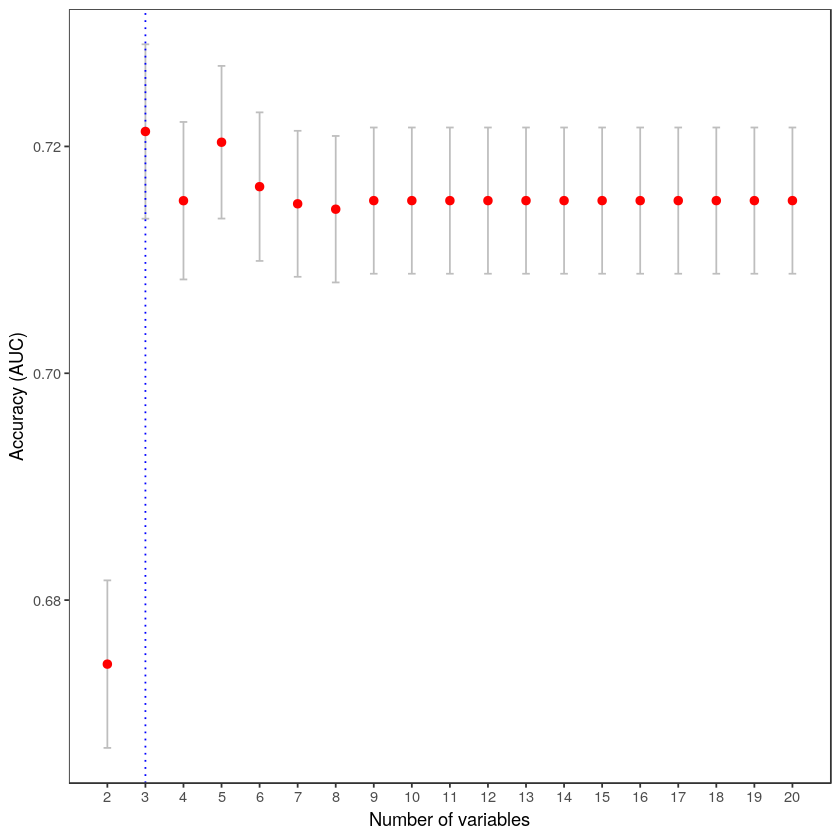

$accuracy.nvar

$var.barplot

$global.plot
TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

$global.plot2
TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

$ROC.plot

$cv.tab
                 % Global  V3   V4   V5
Tenericutes    100    NUM NUM  NUM  NUM
Chordata        88    DEN DEN  DEN  DEN
Synergistetes   62    DEN DEN    0    0
Fusobacteria    24      0   0    0  DEN
Proteobacteria  18      0   0  DEN    0
FREQ             -      - 0.6 0.12 0.12

$cv.accuracy
 [1] 0.8049887 0.6609977 0.6853741 0.5934959 0.7691850 0.6601474 0.7358277
 [8] 0.7429138 0.7595819 0.7668055 0.7519841 0.7431973 0.6581633 0.7897793
[15] 0.7911957 0.6284014 0.7151361 0.7329932 0.7558072 0.7287329 0.6703

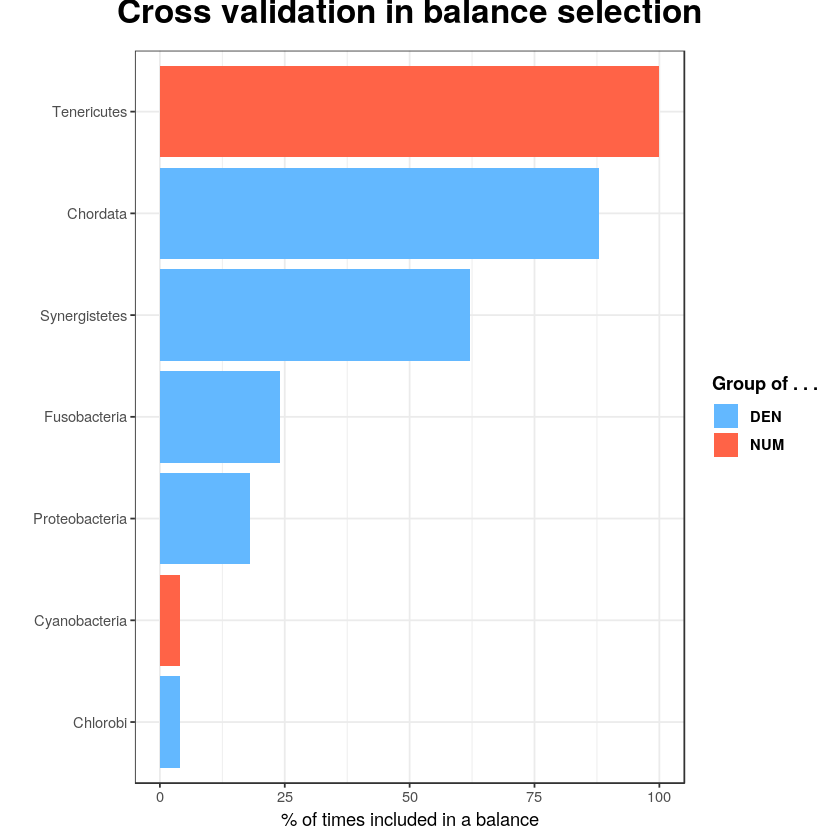

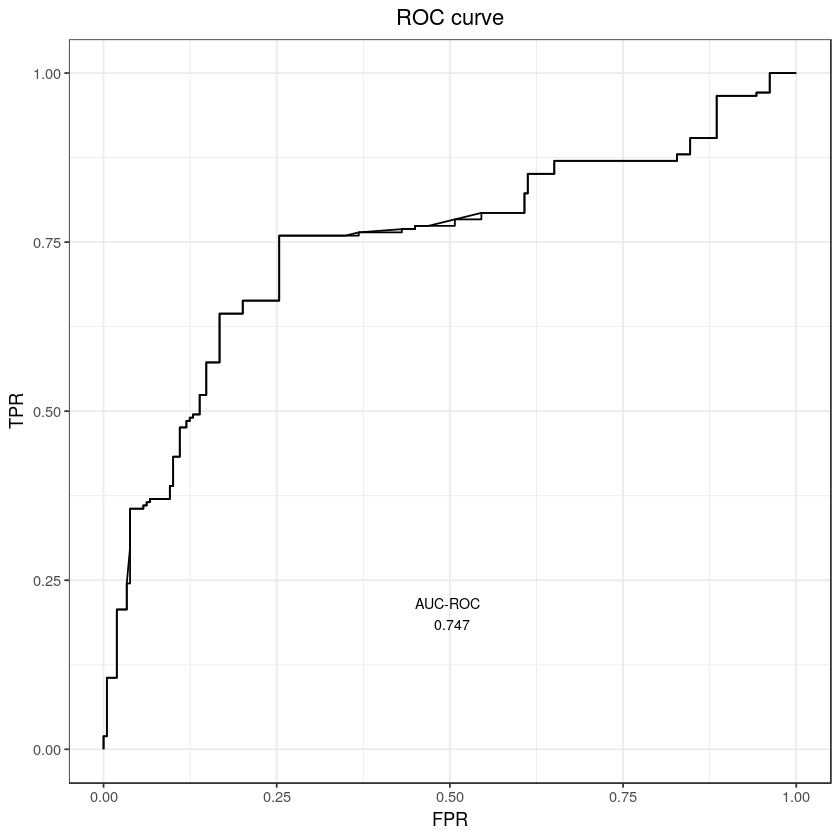

In [18]:
result


In [ ]:
dataset_name = "VogtmannE_2016"
method =  "metaphlan2"
rank = "p"
result = run_selbal(dataset_name, method, rank)

In [ ]:
dataset_list <- list("VogtmannE_2016", "FengQ_2015", "YuJ_2015")
method_list <- list("metaphlan2", "kraken2")
rank_list_metaphlan <- list("p", "c", "f", "g", "s")
rank_list_kraken <- list("P", "C", "F", "G", "S")

In [ ]:
dataset_list <- list("FengQ_2015", "YuJ_2015")
method_list <- list("metaphlan2", "kraken2")
rank_list_metaphlan <- list("p", "c", "f", "g", "s")
rank_list_kraken <- list("P", "C", "F", "G", "S")

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            rank_list = rank_list_metaphlan
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            rank_list = rank_list_metaphlan
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
dataset_list <- list("FengQ_2015", "YuJ_2015")
method_list <- list("metaphlan2", "kraken2")
rank_list_metaphlan <- list("p", "c", "f", "g")
rank_list_kraken <- list("P", "C", "F", "G")

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            if (dataset_name == "FengQ_2015"){
                rank_list = list()
            }
            else {
                rank_list = rank_list_metaphlan
            }
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
dataset_list <- list("FengQ_2015")
method_list <- list("kraken2")
rank_list_kraken <- list("F", "G")

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            if (dataset_name == "FengQ_2015"){
                rank_list = list()
            }
            else {
                rank_list = rank_list_metaphlan
            }
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
dataset_list <- list("YuJ_2015")
method_list <- list("metaphlan2", "kraken2")
rank_list_metaphlan <- list("p", "c", "f", "g")
rank_list_kraken <- list("P", "C", "F", "G")

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            rank_list = rank_list_metaphlan
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
dataset_name <- "YuJ_2015"
method <- "metaphlan2"
rank <- "p"

In [ ]:
path <- "/gfs/data/curated_metagenomes_"
path = paste(path, method, sep="")
path = paste(path, dataset_name, sep="/")
path = paste(path, "csv", sep=".")

mydata <- read.csv(path, header = TRUE, strip.white=TRUE)

In [ ]:
head(mydata)

In [ ]:
path <- "/gfs/data/curated_metagenomes_"
path = paste(path, method, sep="")
path = paste(path, dataset_name, sep="/")
path = paste(path, "csv", sep=".")

mydata <- read.csv(path, header = TRUE, strip.white=TRUE)
df <- data.frame(mydata)

df_g <- df[df$Rank==rank,]
df_g <- df_g[df_g$STUDY_CONDITION != '',]

df_g_subset <- subset(df_g, select=c("Sample_ID", "Name", "Abundance"))
pivot <- cast(df_g_subset, Sample_ID ~ Name)

df_cond <- unique(subset(df_g, select=c("Sample_ID", "STUDY_CONDITION")))

merged <- merge(x = pivot, y = df_cond, by = "Sample_ID", )

merged_sel <- merged[merged$STUDY_CONDITION!='adenoma',]
head(merged_sel)

cols = dim(merged_sel)[2]

# Define x, y and z
x <- merged_sel[,3:cols-1]
#y <- merged_sel[,cols]

#merged_sel$CRC <- merged_sel$STUDY_CONDITION == "CRC"
#merged_sel$CRC <- replace(merged_sel$CRC, merged_sel$CRC, "Pos")
#merged_sel$CRC <- replace(merged_sel$CRC, merged_sel$CRC != "Pos", "Neg")
#y <- merged_sel$CRC
#y_fact <- factor(c(y))

#y_fact <- factor(c(merged_sel$STUDY_CONDITION))
y_fact <- factor(merged_sel$STUDY_CONDITION)
#merged_sel$STUDY_CONDITION[merged_sel$STUDY_CONDITION != 1]  <- 0

#min(merged_sel[!is.na(merged_sel)])
#b = apply(merged_sel, 1, function(x) 1/as.numeric(min(x, na.rm = TRUE)))
x_2 = x

#for (r in 1:dim(x_2)[1]){
#    x_2[r,] = round(x_2[r,]*b[r])
#}

x_2[is.na(x_2)] <- 0
unique(y)

rows = dim(x_2)[1]

for (col_name in colnames(x_2)){
col = x_2[col_name]
if (sum(col != 0) <= rows*0.2){
  drop <- c(col_name)
  x_2 = x_2[,!(names(x_2) %in% drop)]
}
}
x_2[is.na(x_2)] <- 0

result <- selbal.cv(x = x_2, y = y_fact, covar = NULL, n.fold = 5, n.iter = 10, logit.acc = "AUC")

path_for_plot = "save/"
path_for_plot = paste(path_for_plot, dataset_name, sep="")
path_for_plot = paste(path_for_plot, method, sep="_")
path_for_plot = paste(path_for_plot, rank, sep="_")

svg(paste(path_for_plot, "accuracy.svg", sep="_"))
plot(result$accuracy.nvar)
dev.off()

svg(paste(path_for_plot, "barplot.svg", sep="_"))
plot(result$var.barplot)
dev.off()

svg(paste(path_for_plot, "globalplot.svg", sep="_"))
grid.draw(result$global.plot)
dev.off()

svg(paste(path_for_plot, "cvtab.svg", sep="_"))
plot.tab(result$cv.tab)
dev.off()
